<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = requests.get(URL)
csv_data = resp.content
boston_url = io.BytesIO(csv_data)

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **Task 1: Become familiar with the dataset**

The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [9]:
boston_df.head(10) # To display the top 10 row of the dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [10]:
boston_df.tail(10) # To display the bottom 10 row of the dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


## **Task 2: Generate Descriptive Statistics and Visualizations**

### 1) For the "Median value of owner-occupied homes" provide a boxplot

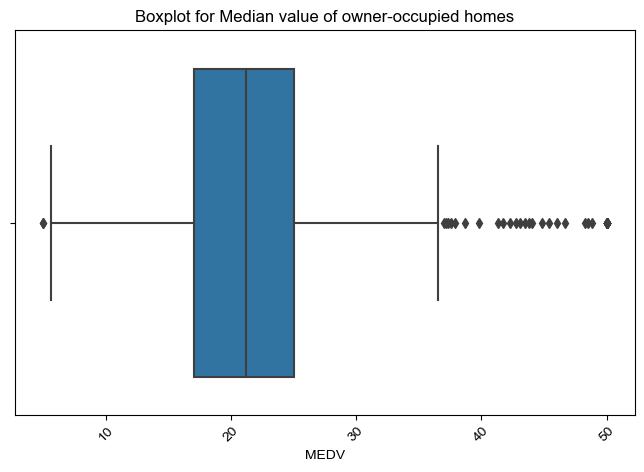

In [11]:
# Set the size of the plot
pyplot.figure(figsize=(8,5))

# Creating a box plot
sns.boxplot(x=boston_df["MEDV"], orient='h')
sns.set_theme(style="darkgrid")

# Enhance the plot
pyplot.xticks(rotation=45) # Rotate the x-axis labels for better readability
pyplot.title("Boxplot for Median value of owner-occupied homes")
pyplot.show()


### 2) Provide a  bar plot for the Charles river variable

In [12]:
# The CHAS variable is in float datatype and the value is in binary format.
# Replace or convert value from binary type to categorycal type
boston_df['CHAS'].replace([0, 1], ['Otherwise', 'Tract bounds river'],inplace=True)

In [13]:
boston_df['CHAS'].info() # To check the data type of the variable. Should be change from float to object.

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: CHAS
Non-Null Count  Dtype 
--------------  ----- 
506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [14]:
print("Distribution of the CHAS variable based on its proportion\n"
      "Tract bounds river:", len(boston_df.query("CHAS == 'Tract bounds river'")),
      "\nOtherwise:", len(boston_df.query("CHAS == 'Otherwise'")))

Distribution of the CHAS variable based on its proportion
Tract bounds river: 35 
Otherwise: 471


In [15]:
# Create a DataFrame with the frequency counts
frequency_table = pd.DataFrame(boston_df['CHAS'].value_counts())

# Rename the columns for clarity
frequency_table.columns = ['Frequency']

# Rename the index for clarity
frequency_table.index.name = 'CHAS'

# Display the frequency table
print(frequency_table)

                    Frequency
CHAS                         
Otherwise                 471
Tract bounds river         35


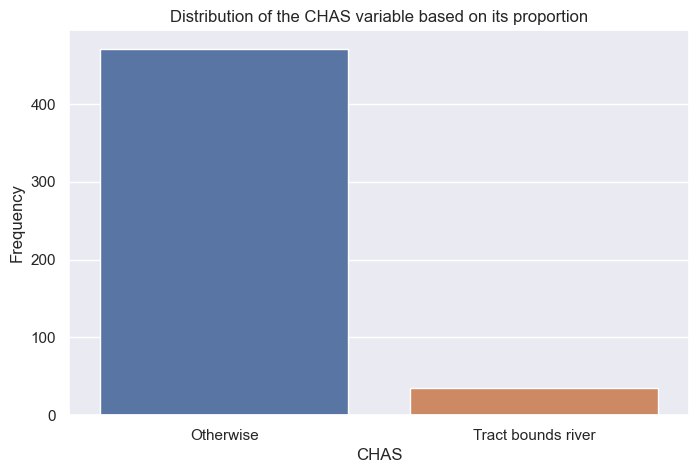

In [16]:
# Set the size of the plot
pyplot.figure(figsize=(8,5))

# Creating a box plot
sns.barplot(x=['Otherwise', 'Tract bounds river'], y='Frequency', data=frequency_table)
sns.set_theme(style="darkgrid")

# Enhance the plot
pyplot.title("Distribution of the CHAS variable based on its proportion")
pyplot.xlabel("CHAS")
pyplot.ylabel("Frequency")
pyplot.show()

### 3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [17]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_G'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_G'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_G'] = '70 years and older'

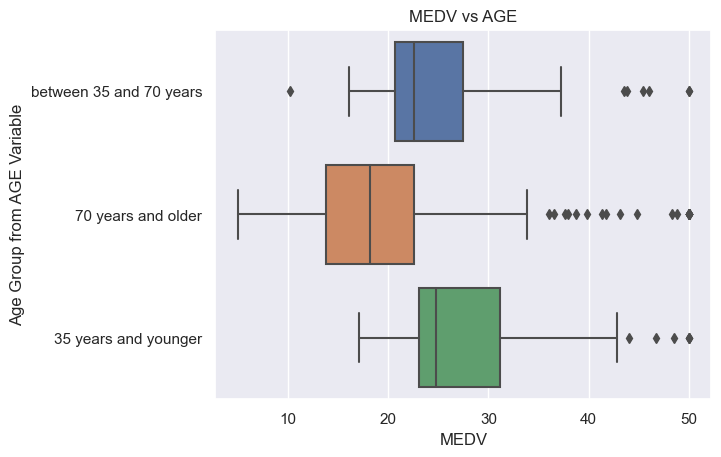

In [18]:
sns.boxplot(data=boston_df, x='MEDV', y='AGE_G')
sns.set_theme(style="darkgrid")

pyplot.title("MEDV vs AGE")
pyplot.ylabel('Age Group from AGE Variable')
pyplot.show()

### 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

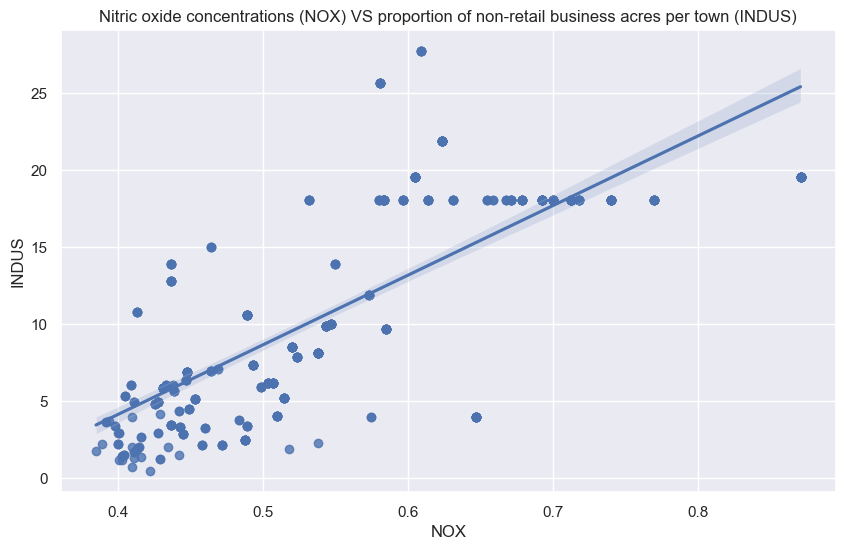

In [19]:
# Set the size of the plot
pyplot.figure(figsize=(10,6))

sns.regplot(data=boston_df, x='NOX', y='INDUS')
sns.set_theme(style="darkgrid")

pyplot.title('Nitric oxide concentrations (NOX) VS proportion of non-retail business acres per town (INDUS)')
pyplot.show()

The scatter plot above was plotted with the regression line (blue) to illustrate more clearly relationship between NOX and group of AGE. From the scatter plot, the line shows the best fitted line with a positive slope. It is and evidence that there is a positive correlation between NOX and group of AGE.

### 5) Create a histogram for the pupil to teacher ratio variable

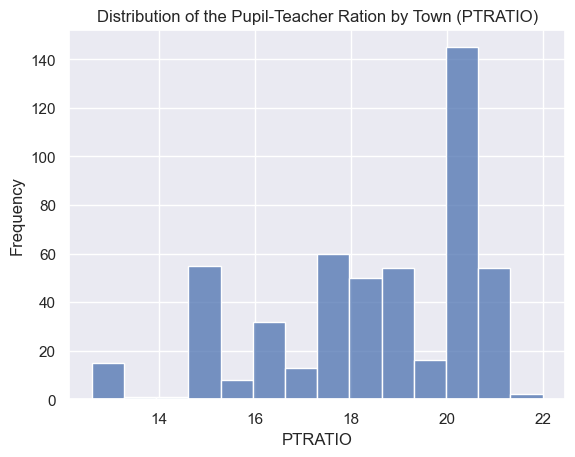

In [20]:
sns.histplot(boston_df['PTRATIO'])
sns.set_theme(style="darkgrid")

pyplot.title('Distribution of the Pupil-Teacher Ration by Town (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

### **Task 3: Use the appropriate tests to answer the questions provided.**

### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

To identify the significant different between MEDV and CHAS variable, Levene Test will be applied and then reconfirm the result using T-test. However, because Levene Test only support for numerical datatype, the CHAS variable which is categorical need to convert back into numerical by using replace function.

In [21]:
# Replace or convert value from binary type to categorycal type
boston_df['CHAS'].replace(['Otherwise', 'Tract bounds river'], [0, 1], inplace=True)

In [22]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   center= 'median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

**Levene Test:**

**Null Hypothesis (H0):** The variances of the two groups (CHAS = 1 and CHAS = 0) are equal.

**Alternative Hypothesis (H1):** The variances of the two groups are not equal.

**Result:** The p-value obtained from the Levene test is approximately 0.0326 which is less than the significance level (α = 0.05), thus we reject the null hypothesis. This suggests that there is evidence to conclude that the variances of the two groups are significantly different.

Then, proceed with the T-test to reconfirm the result from Levene Test.

In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**T-test:**

**Null Hypothesis (H0):** The mean of the two groups (CHAS = 1 and CHAS = 0) are equal.

**Alternative Hypothesis (H1):** The mean of the two groups are not equal.

**Result:** The p-value obtained from the T-test is approximately 0.00357 which is less than the significance level (α = 0.05), thus we reject the null hypothesis. This suggests that there is evidence to conclude that the mean of the two groups are significantly different.

### 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



In [24]:
print(boston_df['AGE_G'].unique())

['between 35 and 70 years' '70 years and older' '35 years and younger']


In [25]:
thirtyfive_lower = boston_df[boston_df['AGE_G'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_G'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_G'] == '70 years and older']['MEDV']

Run a one-way ANOVA

In [26]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older, )
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Null Hypothesis (H0):** The mean value value between AGE group and MEDV are equal

**Alternative Hypothesis (H1):** The mean value value between AGE group and MEDV are not equal

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

**Null Hypothesis (H0):** No relationship between NOX and INDUS variables.

**Alternative Hypothesis (H1):** Relationship exist between NOX and INDUS variables.

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

### 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [28]:
# X is the input variables (or independent variables)
X = boston_df['DIS']
# y is the target/dependent variable
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        15:23:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's assume we have a simple linear regression model:

Y = β₀ + β₁X + ϵ

Where:

Y is the dependent variable.
X is the independent variable.
β₀ is the intercept (constant term).
β₁ is the coefficient of the independent variable.
ϵ is the error term.

Based on the statistical summary of regression model, the β₀ (constant) = 18.3901 and β₁ (DIS coefficient) = 1.0916.
Thus, the simple  linear regression equation can be written as follows:

Y = 18.3901 + 0916*DIS

In [32]:
# Regression Line Equation
def medv_value(DIS):
    const = 18.3901
    coeff_DIS = 1.0916 
    y = const + (coeff_DIS * DIS)
    return y

medv_value(1)

19.4817

We could conclude from the previous computation that a DIV value of 1 will provide a MEDV value of 19.4817. Below is the regression plot between these two variables.

<Axes: xlabel='DIS', ylabel='MEDV'>

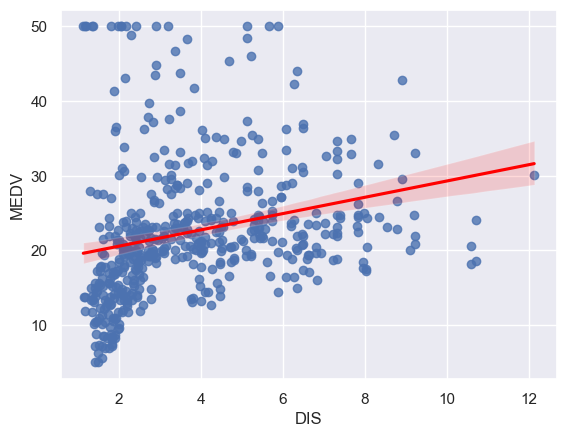

In [30]:
sns.regplot(data=boston_df, x='DIS', y='MEDV', line_kws={'color':'Red'})